### SVD-Filters

In [1]:
import radon
import torch
import matplotlib as mpl
import matplotlib.pyplot as plt

import ipywidgets as widgets 
from ipywidgets import interactive

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif"
})

#mpl.use("WebAgg")

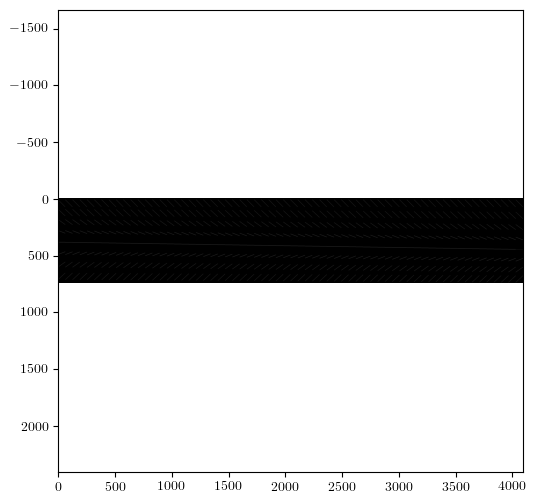

In [3]:
matrix8 = radon.radon_matrix(torch.zeros((64,64)), thetas=torch.linspace(0.0, torch.pi, 9)[:-1]).reshape(-1, 64*64)

plt.close('all')
plt.figure(figsize=(6,6))
plt.imshow(matrix8, cmap="gray")
plt.axis("equal")
plt.show()

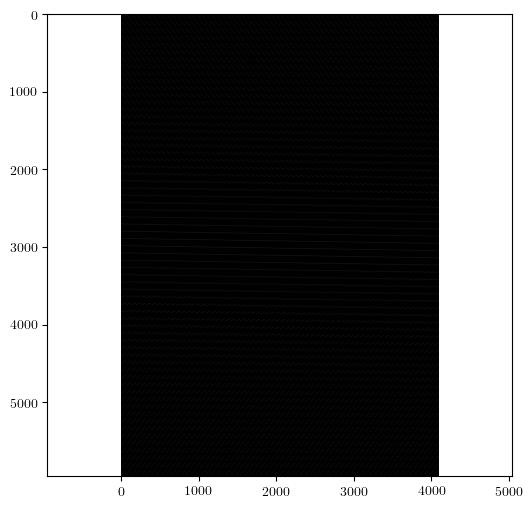

In [4]:
matrix64 = radon.radon_matrix(torch.zeros((64,64)), thetas=torch.linspace(0.0, torch.pi, 65)[:-1]).reshape(-1, 64*64)

plt.close('all')
plt.figure(figsize=(6,6))
plt.imshow(matrix64, cmap="gray")
plt.axis("equal")
plt.show()

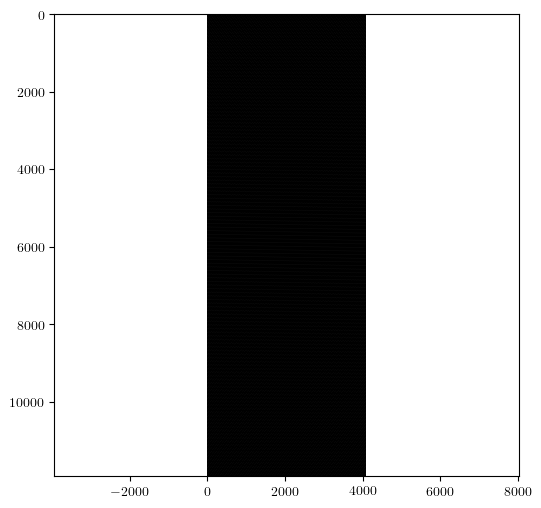

In [5]:
matrix128 = radon.radon_matrix(torch.zeros((64,64)), thetas=torch.linspace(0.0, torch.pi, 129)[:-1]).reshape(-1, 64*64)

plt.close('all')
plt.figure(figsize=(6,6))
plt.imshow(matrix128, cmap="gray")
plt.axis("equal")
plt.show()

In [6]:
v8,d8,ut8 = torch.linalg.svd(matrix8, full_matrices= True)
v128,d128,ut128 = torch.linalg.svd(matrix128, full_matrices= True)

In [7]:
v64,d64,ut64 = torch.linalg.svd(matrix64, full_matrices= True)

In [8]:
print(v8.shape)
print(v64.shape)
print(v128.shape)

torch.Size([744, 744])
torch.Size([5952, 5952])
torch.Size([11904, 11904])


In [10]:
def sing_funcs_at_index(idx):
    left_sing_func = v8[:,idx].reshape(8,-1)
    right_sing_func = ut8[idx,:].reshape(64,64)
    fig,axs = plt.subplots(3,2)
    axs[0,0].imshow(left_sing_func.mT)
    axs[0,1].imshow(right_sing_func)

    left_sing_func = v64[:,idx].reshape(64,-1)
    right_sing_func = ut64[idx,:].reshape(64,64)
    axs[1,0].imshow(left_sing_func.mT)
    axs[1,1].imshow(right_sing_func)
    
    left_sing_func = v128[:,idx].reshape(128,-1)
    right_sing_func = ut128[idx,:].reshape(64,64)
    axs[2,0].imshow(left_sing_func.mT)
    axs[2,1].imshow(right_sing_func)

slider = widgets.IntSlider(min = 0, max = 743, step = 1, value = 0, continuous_update = True)
interactive_plot = interactive(sing_funcs_at_index, idx = slider)


In [11]:
interactive_plot

interactive(children=(IntSlider(value=0, description='idx', max=743), Output(outputs=({'output_type': 'display…

interactive(children=(IntSlider(value=0, description='idx', max=4096), Output()), _dom_classes=('widget-intera…

In [68]:
#1-D Fourier-Transform as a matrix
I = 10
J = 17
size = 10
F = torch.zeros(I*J, I*J, dtype = torch.cfloat)
for theta in range(I):
    for k in range(J):
        for s in range(J):
            F[J*theta+k, J*theta+s] = torch.polar(torch.Tensor([1/J]), torch.Tensor([-2*torch.pi*k*s/J]))

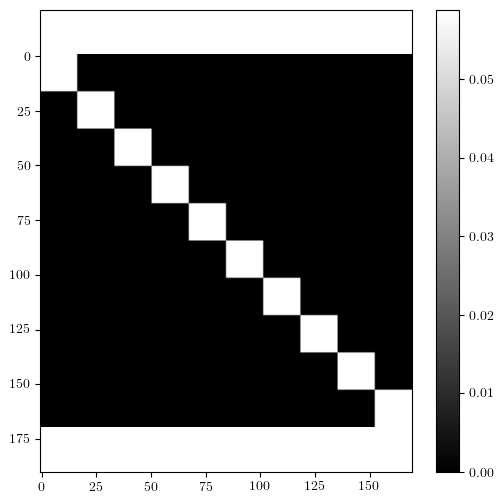

In [69]:
plt.figure(figsize=(6,6))
plt.imshow(F.abs(), cmap="gray")
plt.colorbar()
plt.axis("equal")
plt.show()

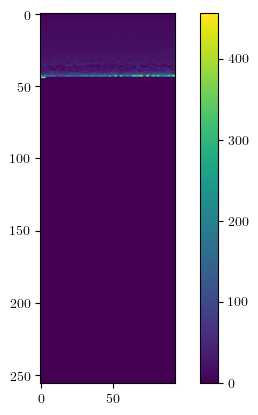

In [82]:
coeffs = torch.load("results/svd_low_analytic/noise_level=0.005/coefficients.pt", map_location="cpu").detach()
sigma = torch.load("results/svd_low_analytic/noise_level=0.005/singularvals.pt", map_location='cpu').detach()

filter = torch.zeros(23808)
filter[:4096] = coeffs/sigma

filter_img  = filter.reshape(256, -1)

plt.imshow(filter_img)
plt.colorbar()
plt.show()